# TASK 1
Create a DVC repository for your project.


In [7]:
%%bash
git init
dvc init

Reinitialized existing Git repository in /mnt/c/Users/erykp/Documents/GitHub/data_mining/assignment_3/.git/
Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


# TASK 2
2. Get familiar with the kaggle competition Tabular Playground Series - Jul 2022

# TASK 3
3. Load the data into the repository. After each of the next steps, update your
repository.


In [ ]:
alraedy_done = True

# TASK 4
4. As you have probably noticed, the data for this competition is obscure. We have 28 features, some of which are continuous and some are categorical. There is no additional information on the data - where does it come from, dwhat does it stand for? Propose a set of normalization schemas.

<Axes: >

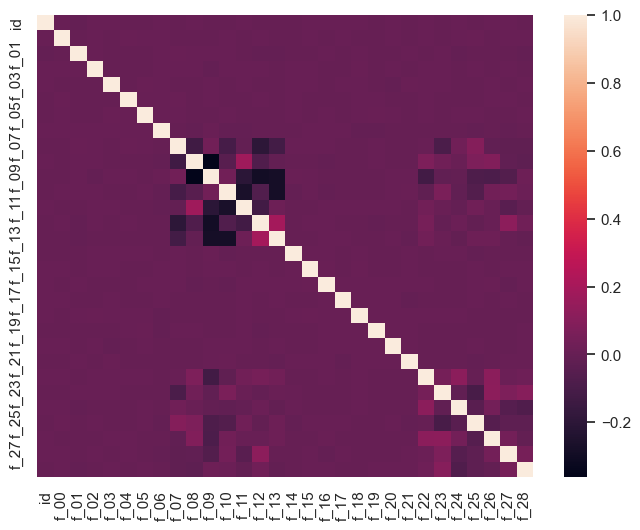

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Normalizer

tabular_playground_series = pd.read_csv('data/data.csv')
tabular_playground_series.describe()

sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(tabular_playground_series.corr())

In [83]:
# plot 5 random continuous features against each other
def plot_random_continuous_features(df, continuous_features, n=4):
    features = np.random.choice(continuous_features, n)
    sns.pairplot(df[features])

In [63]:
# find out which features are discrete and which are continuous
discrete_features = [column for column in tabular_playground_series.columns if tabular_playground_series[column].nunique() < 100]
print(discrete_features)

continuous_features = [column for column in tabular_playground_series.columns if column not in discrete_features]
continuous_features.remove('id')
print(continuous_features)

['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']
['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']


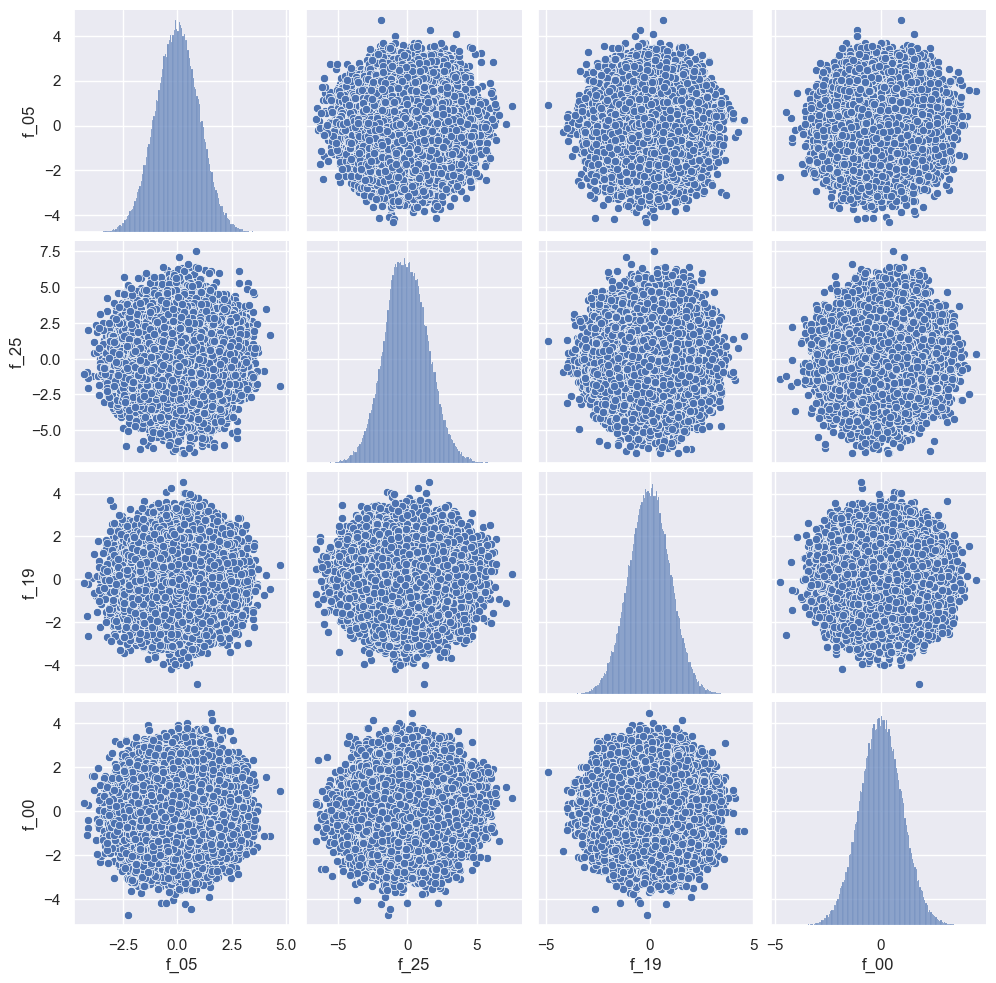

In [84]:
plot_random_continuous_features(tabular_playground_series, continuous_features)

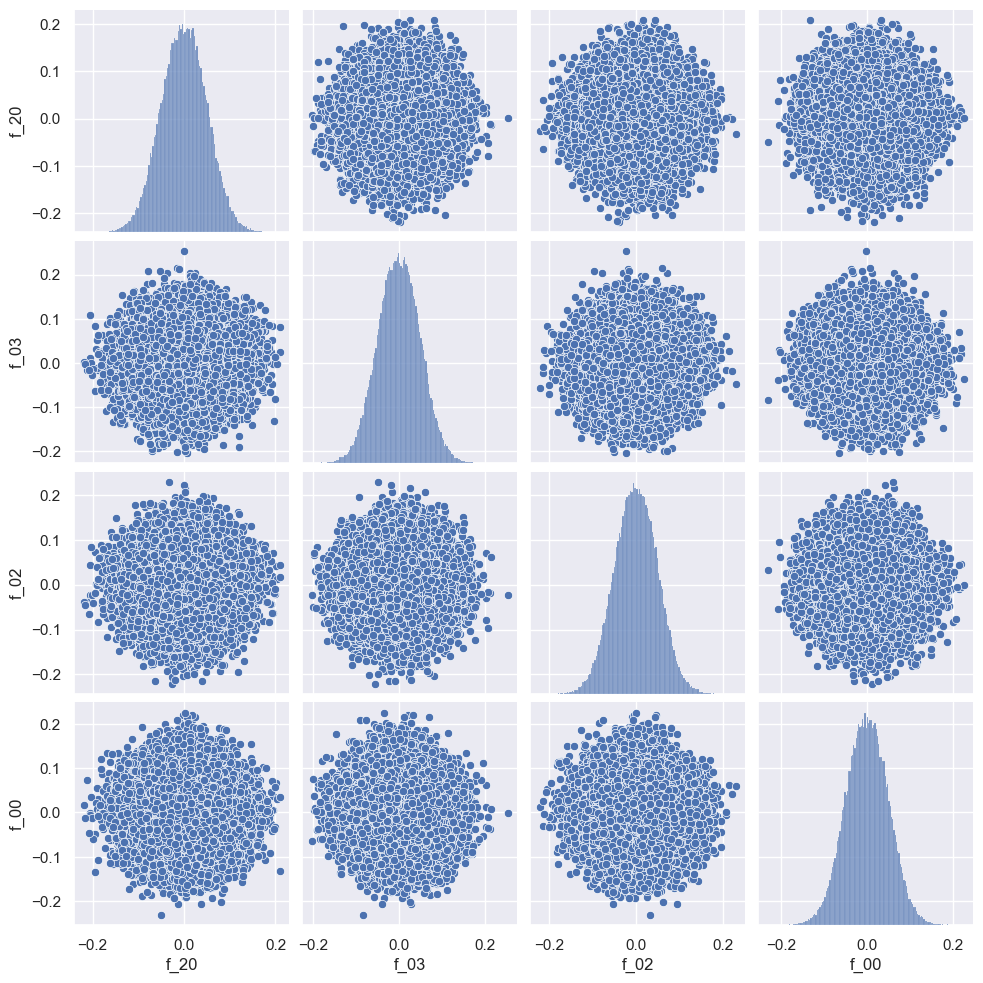

In [85]:
t = Normalizer(norm = 'l1').fit(tabular_playground_series[continuous_features])
tabular_playground_series_l1 = tabular_playground_series.copy()
tabular_playground_series_l1[continuous_features] = t.transform(tabular_playground_series[continuous_features])
plot_random_continuous_features(tabular_playground_series_l1, continuous_features)

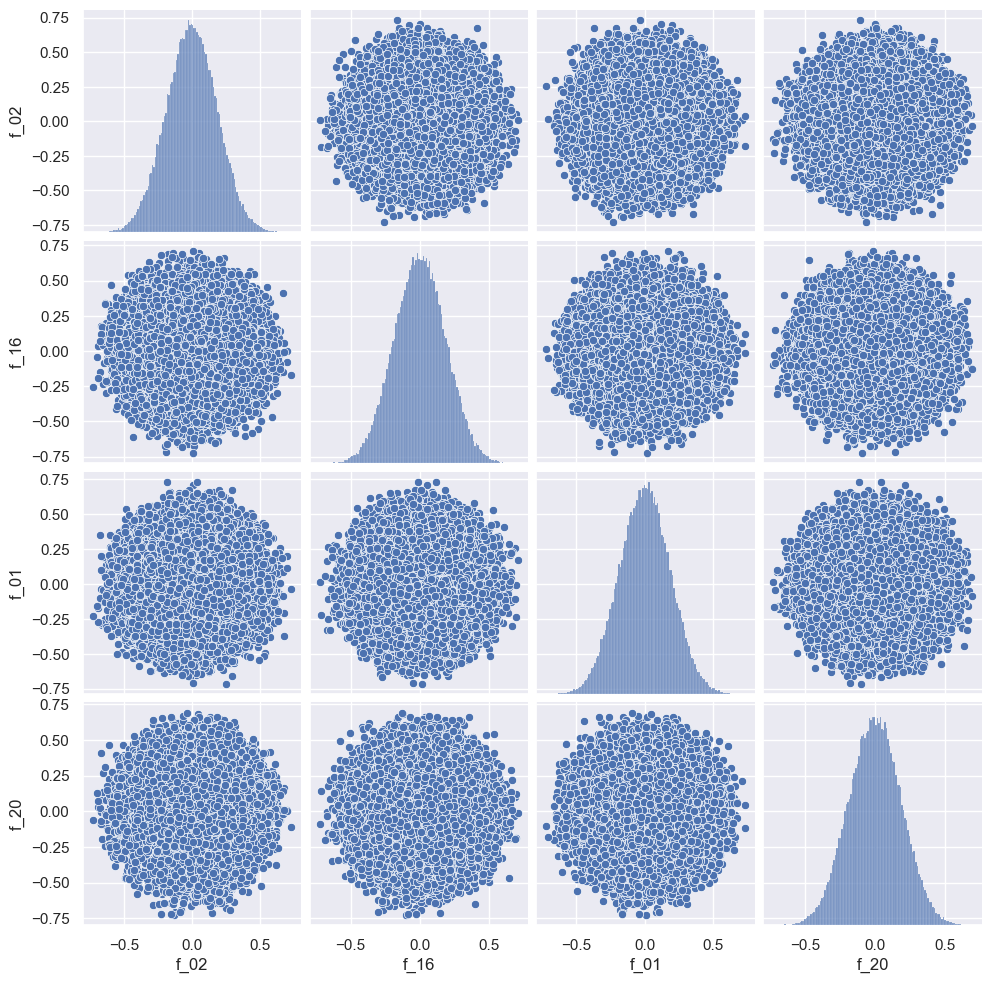

In [87]:
t = Normalizer(norm = 'l2').fit(tabular_playground_series[continuous_features])
tabular_playground_series_l2 = tabular_playground_series.copy()
tabular_playground_series_l2[continuous_features] = t.transform(tabular_playground_series[continuous_features])

plot_random_continuous_features(tabular_playground_series_l2, continuous_features)

# TASK 5
5. Use DB-index and Silhouette coefficient in order to propose a set of numbers of clusters.

<Axes: xlabel='n_clusters'>

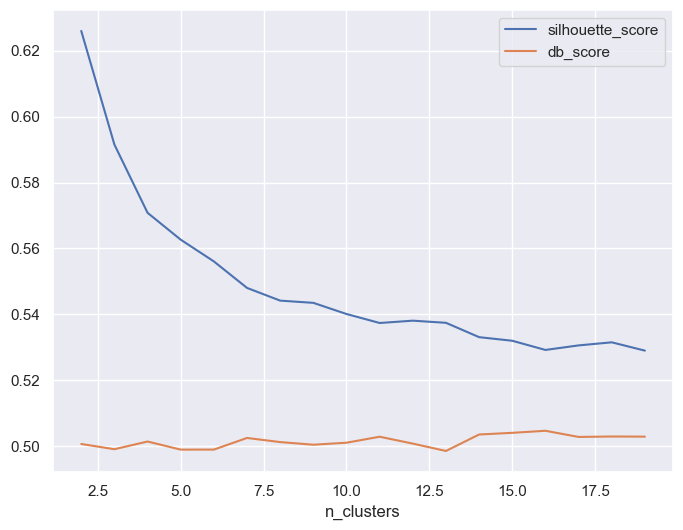

In [101]:
# use db-index and silhouette coefficient to find the best number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

def find_best_number_of_clusters(df, n=20):
    scores = []x
    for i in range(2, n):
        kmeans = KMeans(n_init='auto', n_clusters=i, max_iter=3000).fit(df)
        labels = kmeans.labels_
        scores.append([i, silhouette_score(df, labels, metric='euclidean'), davies_bouldin_score(df, labels)])
    return scores

# choose subset of elements to speed up the process
tabular_playground_series_l1_subset = tabular_playground_series_l1.sample(frac=0.2)

scores = find_best_number_of_clusters(tabular_playground_series_l1_subset)
scores = pd.DataFrame(scores, columns=['n_clusters', 'silhouette_score', 'db_score'])
scores.plot(x='n_clusters', y=['silhouette_score', 'db_score'])

# TASK 6
6. Perform clustering with k-means and DBSCAN. You should end up with at least 16 different models.

In [102]:
# Perform clustering with k-means and DBSCAN. You should end up with at least 16 different models.

n_clusters = 6
kmeans = KMeans(n_init='auto', n_clusters=n_clusters, max_iter=3000).fit(tabular_playground_series_l1)
labels = kmeans.labels_
tabular_playground_series_l1['kmeans'] = labels

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(tabular_playground_series_l1)
labels = dbscan.labels_
tabular_playground_series_l1['dbscan'] = labels

# Plot the clusters using PCA and TSNE. Do you notice any patterns?

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_clusters(df, cluster_column, n_clusters):
    pca = PCA(n_components=2).fit_transform(df)
    tsne = TSNE(n_components=2).fit_transform(df)
    df_pca = pd.DataFrame(pca, columns=['pca1', 'pca2'])
    df_tsne = pd.DataFrame(tsne, columns=['tsne1', 'tsne2'])
    df_pca['cluster'] = df_tsne['cluster'] = df[cluster_column]
    sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_pca, palette=sns.color_palette('hls', n_clusters))
    sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=df_tsne, palette=sns.color_palette('hls', n_clusters))

plot_clusters(tabular_playground_series_l1, 'kmeans', n_clusters)
plot_clusters(tabular_playground_series_l1, 'dbscan', n_clusters)


KeyboardInterrupt: 

# TASK 7
7. Use feature selection methods in order to prepare visualizations of your clustering methods. For each model calculate the similarities between clusters - visualize the similarities with a heatmap (use several definitions of cluster similarity). Compile the data as a table.


# TASK 8
8. Based on the visualizations, choose a clustering method, which seems the best. Justify your choice.

In [ ]:
#